In [64]:
#from ssbspørring import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emd
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
postUrl = 'https://data.ssb.no/api/v0/no/table/11597/'
query = {
  "query": [
    {
      "code": "Valuta",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Lantaker3",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "05",
          "06",
          "07"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Aarstransprosent"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [3]:
df = apiToDataframe(postUrl, query)[0]
df = df.drop(['valuta', 'statistikkvariabel'], axis=1)
df.måned = pd.to_datetime(df.måned, format='%YM%m' )
df = df.rename(columns = {'value' : 'gjeldsvekst'})

TypeError: 'Figure' object is not callable

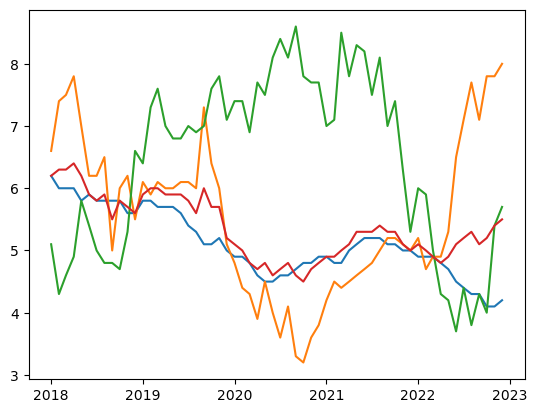

In [69]:
plot_ts_group(df, 'låntaker', 'måned', 'gjeldsvekst')

In [5]:
imf = emd.sift.sift(df.query('låntaker == "Ikke-finansielle foretak"')['gjeldsvekst'])
#imf = emd.sift.sift(df.query('låntaker == "Publikum"').value)
print(imf.shape)

(60, 4)


/Users/williamsoma/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]


In [68]:
def plot_ts_group(df, group_name, x, y):
    groups = df.groupby(group_name)
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot( group[x], group[y], label=name)
    
    ax.figure(figsize=(10, 4))
    ax.grid(True)
    ax.legend()
    plt.show()

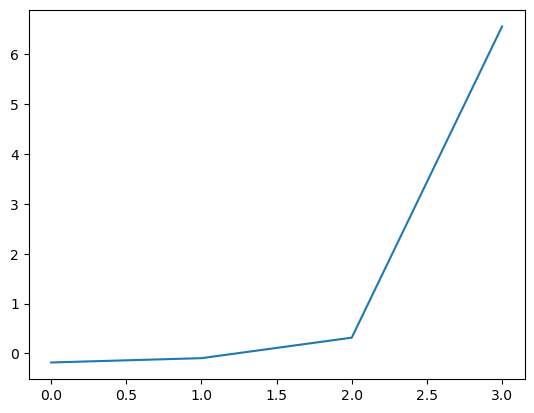

In [6]:
plt.plot(imf[0])

<AxesSubplot: xlabel='Time (samples)'>

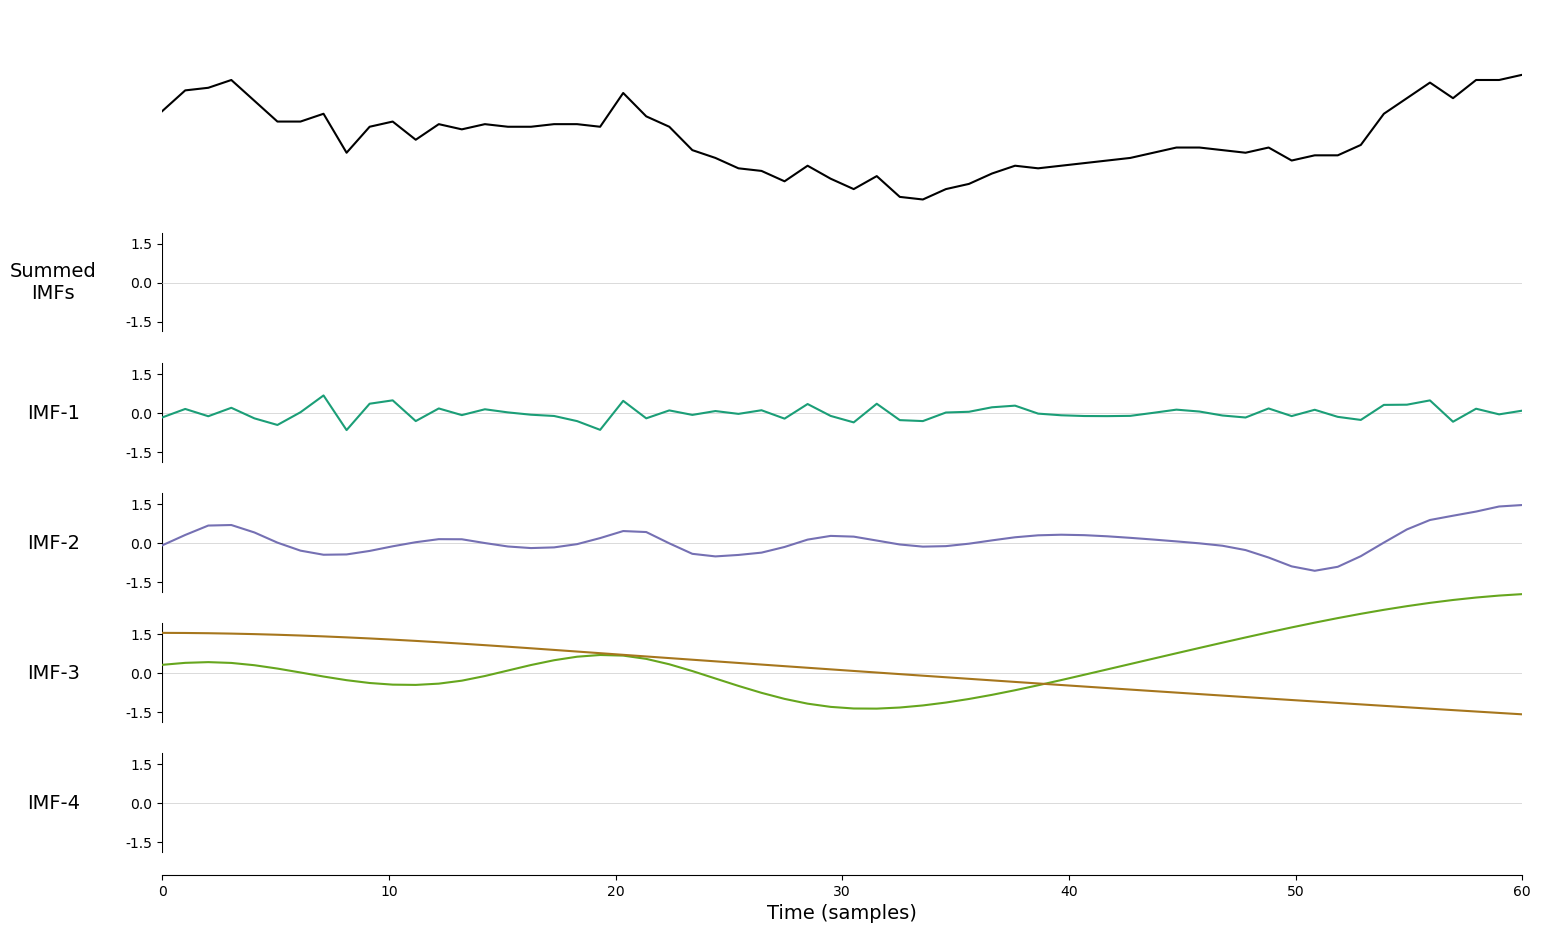

In [7]:
emd.plotting.plot_imfs(imf)

In [8]:
# nye lån ikke-finanisell
lånURL = 'https://data.ssb.no/api/v0/no/table/10729/'
lån_query = {
  "query": [
    {
      "code": "Utlanstype",
      "selection": {
        "filter": "item",
        "values": [
          "02"
        ]
      }
    },
    {
      "code": "Sektor",
      "selection": {
        "filter": "item",
        "values": [
          "03"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [9]:
df2 = apiToDataframe(lånURL, lån_query)[0]
df2.måned = pd.to_datetime(df2.måned, format='%YM%m' )
df2.rename(columns= {'value': 'rente'}, inplace = True)
df2 = df2.iloc[:,3:]

In [10]:
apiToDataframe(lånURL, lån_query)[0]

,utlånstype,sektor,statistikkvariabel,måned,value
0,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M01,2.83
1,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M02,3.02
2,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M03,2.96
3,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M04,3.15
4,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M05,2.94
5,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M06,3.01
6,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M07,3.06
7,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M08,2.75
8,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M09,2.97
9,Totale nedbetalingslån,Ikke-finansielle foretak,Renter på nye utlån,2018M10,3.07


In [11]:
df3 = pd.merge(df,df2,on='måned')
#df3 = df3.set_index(['låntaker', 'måned'])
df3

,låntaker,måned,gjeldsvekst,rente
0,Publikum,2018-01-01,6.2,2.83
1,"Husholdninger, mv.",2018-01-01,6.2,2.83
2,Ikke-finansielle foretak,2018-01-01,6.6,2.83
3,Kommuneforvaltningen,2018-01-01,5.1,2.83
4,Publikum,2018-02-01,6.3,3.02
...,...,...,...,...
235,Kommuneforvaltningen,2022-11-01,5.4,5.01
236,Publikum,2022-12-01,5.5,5.08
237,"Husholdninger, mv.",2022-12-01,4.2,5.08
238,Ikke-finansielle foretak,2022-12-01,8.0,5.08


<AxesSubplot: xlabel='måned'>

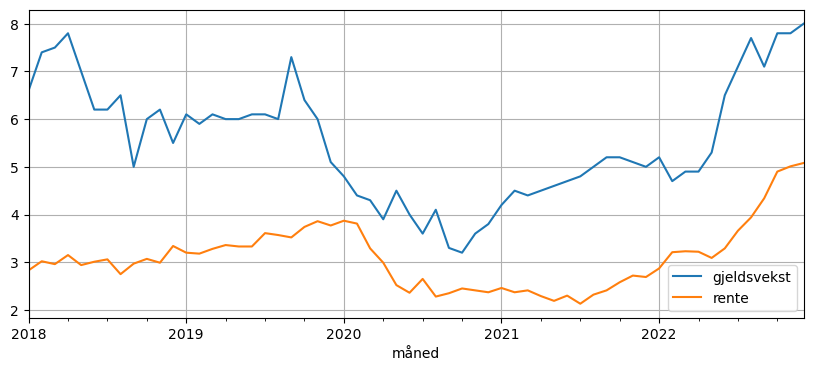

In [60]:
df3.query('låntaker == "Ikke-finansielle foretak"').plot(x = 'måned', grid = True, figsize=(10, 4))

In [13]:
df3.query('låntaker == "Ikke-finansielle foretak"')

,låntaker,måned,gjeldsvekst,rente
2,Ikke-finansielle foretak,2018-01-01,6.6,2.83
6,Ikke-finansielle foretak,2018-02-01,7.4,3.02
10,Ikke-finansielle foretak,2018-03-01,7.5,2.96
14,Ikke-finansielle foretak,2018-04-01,7.8,3.15
18,Ikke-finansielle foretak,2018-05-01,7.0,2.94
22,Ikke-finansielle foretak,2018-06-01,6.2,3.01
26,Ikke-finansielle foretak,2018-07-01,6.2,3.06
30,Ikke-finansielle foretak,2018-08-01,6.5,2.75
34,Ikke-finansielle foretak,2018-09-01,5.0,2.97
38,Ikke-finansielle foretak,2018-10-01,6.0,3.07


In [14]:
# Create the formula string for the OLS regression
formula_string = 'gjeldsvekst ~ rente.shift(-2)'

# Fit the OLS regression model using the formula and the data
model = ols(formula=formula_string, data=df3.query('låntaker == "Ikke-finansielle foretak"')).fit(cov_type='HC3')

# Print a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            gjeldsvekst   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           9.72e-16
Time:                        14:22:18   Log-Likelihood:                -70.637
No. Observations:                  58   AIC:                             145.3
Df Residuals:                      56   BIC:                             149.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5176      0.390     

In [85]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(model.summary().as_latex())
f.write(endtex)
f.close()

In [58]:
test = df3.query('låntaker == "Ikke-finansielle foretak"')
test['lol'] = test.rente.shift(2)
test

/var/folders/_3/rnpxztfs6yj0szzqfjfw3vxc0000gn/T/ipykernel_73501/3119352186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lol'] = test.rente.shift(2)


,låntaker,måned,gjeldsvekst,rente,lol
2,Ikke-finansielle foretak,2018-01-01,6.6,2.83,NaN
6,Ikke-finansielle foretak,2018-02-01,7.4,3.02,NaN
10,Ikke-finansielle foretak,2018-03-01,7.5,2.96,2.83
14,Ikke-finansielle foretak,2018-04-01,7.8,3.15,3.02
18,Ikke-finansielle foretak,2018-05-01,7.0,2.94,2.96
22,Ikke-finansielle foretak,2018-06-01,6.2,3.01,3.15
26,Ikke-finansielle foretak,2018-07-01,6.2,3.06,2.94
30,Ikke-finansielle foretak,2018-08-01,6.5,2.75,3.01
34,Ikke-finansielle foretak,2018-09-01,5.0,2.97,3.06
38,Ikke-finansielle foretak,2018-10-01,6.0,3.07,2.75


In [14]:
het_breuschpagan(model.resid, model.model.exog)

(1.7691782998396368,
 0.8800717918115669,
 0.3262311439095171,
 0.8948172786957229)

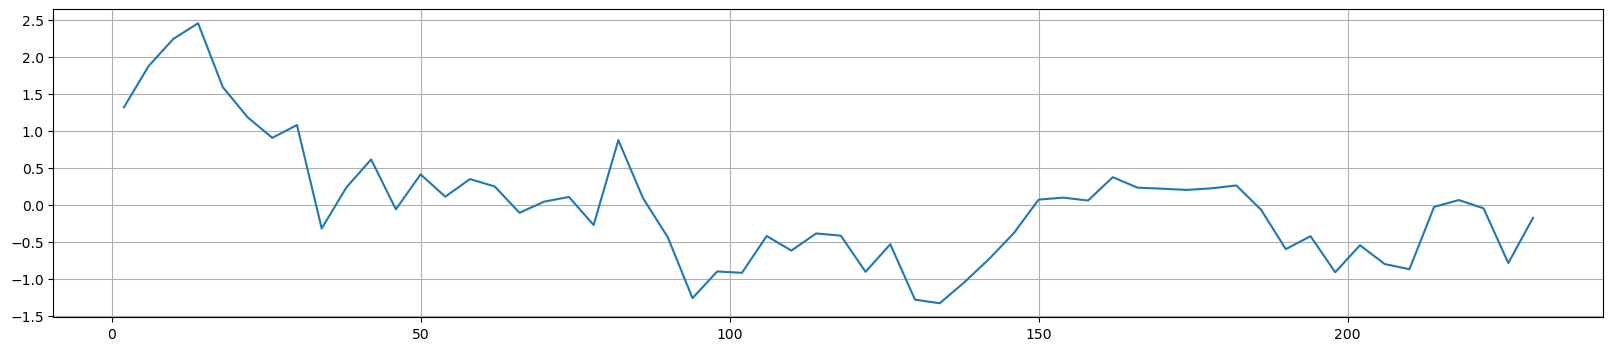

In [56]:
plt.figure(figsize=(20, 4))
plt.grid(True)
plt.plot(model.resid)

<AxesSubplot: xlabel='Time (samples)'>

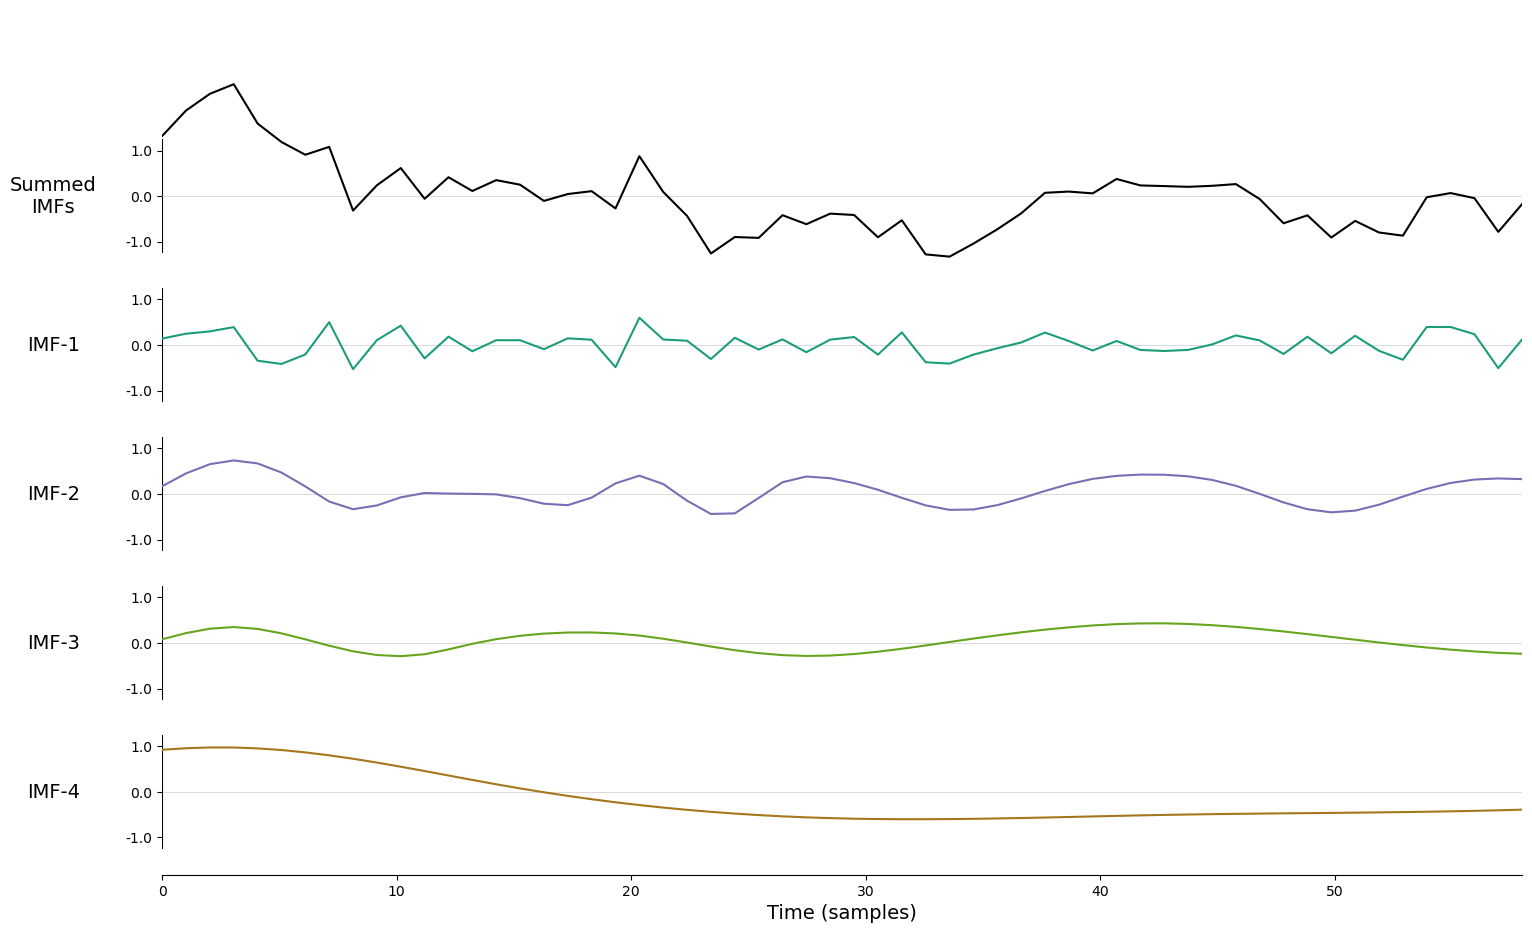

In [53]:
imf2 = emd.sift.sift(model.resid)
emd.plotting.plot_imfs(imf2)

In [32]:
IP, IF, IA = emd.spectra.frequency_transform(imf2, 1, 'nht')
f, spec_weighted = emd.spectra.hilberthuang(IF, IA, freq_edges, sum_imfs=False)

NameError: name 'freq_edges' is not defined

Text(0.5, 0, 'Frequency (måneder)')

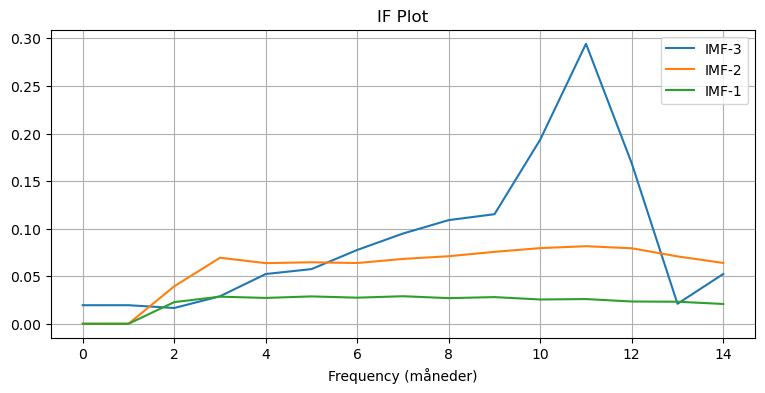

In [54]:
IP, IF, IA = emd.spectra.frequency_transform(imf2, 1, 'nht')
plt.figure(figsize=(20, 4))

plt.subplot(121)
plt.plot(IF[:15,1:])
plt.grid(True)
plt.legend(['IMF-3', 'IMF-2', 'IMF-1'])
plt.title('IF Plot')
#plt.xticks(np.arange(0, 20, 5))
plt.xlabel('Frequency (måneder)')

In [ ]:
hht_f, spec = emd.spectra.hilberthuang(IF, IA, freq_range, scaling='density')

plt.figure()
plt.plot(fft_f, np.abs(pyy))
plt.plot(hht_f, spec)
plt.legend(['Fourier Transform', 'Hilbert-Huang Transform'], frameon=False)
plt.xlim(0, 20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

Text(0.5, 0, 'Frequency (hz)')

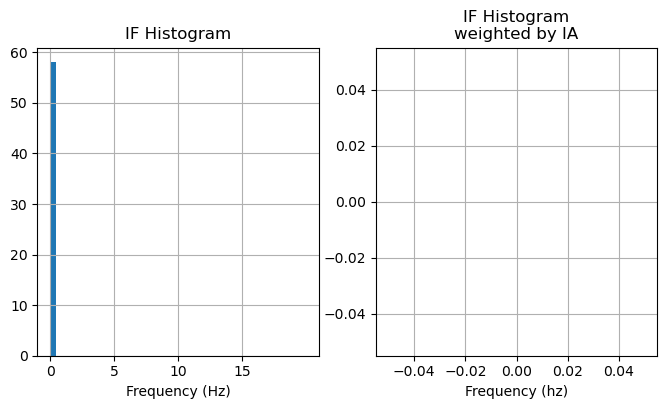

In [28]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
# Plot a simple histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 20))
plt.grid(True)
plt.title('IF Histogram')
plt.xticks(np.arange(0, 20, 5))
plt.xlabel('Frequency (Hz)')

plt.subplot(122)
# Plot an amplitude-weighted histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 0), weights=IA[:, 2])
plt.grid(True)
plt.title('IF Histogram\nweighted by IA')
#plt.xticks(np.arange(0, 20, 5))
plt.xlabel('Frequency (hz)')

In [17]:
# kraft. Variabel pris kontrakter, industri unntatt kraftintensiv industri
strømURL = 'https://data.ssb.no/api/v0/no/table/09364/'
strøm_query = {
  "query": [
    {
      "code": "Kraftpriser",
      "selection": {
        "filter": "item",
        "values": [
          "03.4"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KraftprisEA"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017K1",
          "2017K2",
          "2017K3",
          "2017K4",
          "2018K1",
          "2018K2",
          "2018K3",
          "2018K4",
          "2019K1",
          "2019K2",
          "2019K3",
          "2019K4",
          "2020K1",
          "2020K2",
          "2020K3",
          "2020K4",
          "2021K1",
          "2021K2",
          "2021K3",
          "2021K4",
          "2022K1",
          "2022K2",
          "2022K3"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [18]:
kraft = apiToDataframe(strømURL, strøm_query)[0]
kraft = kraft.iloc[:,2:]
kraft.kvartal = kraft.kvartal.str.replace('K','Q')
kraft['kvartal'] = pd.to_datetime(kraft.kvartal)
kraft = kraft.rename(columns = {'kvartal' : 'måned'})
kraft

,måned,value
0,2017-01-01,36.3
1,2017-04-01,32.3
2,2017-07-01,32.2
3,2017-10-01,36.7
4,2018-01-01,42.6
5,2018-04-01,44.4
6,2018-07-01,54.8
7,2018-10-01,55.6
8,2019-01-01,56.4
9,2019-04-01,47.8


In [19]:
kraft['strømprisvekst'] = kraft['value']/kraft['value'].shift(4)
kraft = kraft.dropna()
kraft = kraft.drop(columns = ['value'])
kraft

,måned,strømprisvekst
4,2018-01-01,1.173554
5,2018-04-01,1.374613
6,2018-07-01,1.701863
7,2018-10-01,1.514986
8,2019-01-01,1.323944
9,2019-04-01,1.076577
10,2019-07-01,0.806569
11,2019-10-01,0.821942
12,2020-01-01,0.448582
13,2020-04-01,0.280335


In [20]:
df4 = pd.merge(df3,kraft,on = 'måned')
df4

,låntaker,måned,gjeldsvekst,rente,strømprisvekst
0,Publikum,2018-01-01,6.2,2.83,1.173554
1,"Husholdninger, mv.",2018-01-01,6.2,2.83,1.173554
2,Ikke-finansielle foretak,2018-01-01,6.6,2.83,1.173554
3,Kommuneforvaltningen,2018-01-01,5.1,2.83,1.173554
4,Publikum,2018-04-01,6.4,3.15,1.374613
...,...,...,...,...,...
71,Kommuneforvaltningen,2022-04-01,4.3,3.22,2.073892
72,Publikum,2022-07-01,5.2,3.66,1.930508
73,"Husholdninger, mv.",2022-07-01,4.4,3.66,1.930508
74,Ikke-finansielle foretak,2022-07-01,7.1,3.66,1.930508


<AxesSubplot: xlabel='måned'>

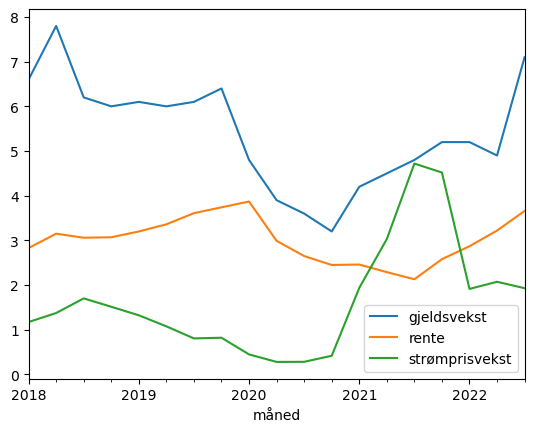

In [21]:
df4.query('låntaker == "Ikke-finansielle foretak"').plot(x = 'måned')

In [61]:
# Create the formula string for the OLS regression
formula_string = 'gjeldsvekst ~ rente.shift(-1) + strømprisvekst + strømprisvekst.shift(-1) + strømprisvekst.shift(-2)'

# Fit the OLS regression model using the formula and the data
model = ols(formula=formula_string, data=df4.query('låntaker == "Ikke-finansielle foretak"')).fit()

# Print a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            gjeldsvekst   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.450
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.274
Time:                        09:38:17   Log-Likelihood:                -24.542
No. Observations:                  17   AIC:                             57.08
Df Residuals:                      13   BIC:                             60.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/Users/williamsoma/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
